In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import stressTransformations as s

In [2]:
def vonMissesG(sy,s1,s2):
    tmax = (s1+s2)/2
    T = np.linspace(0,2*np.pi)
    x = lambda t: sy*np.sqrt(2)*np.cos(t)*np.cos(np.radians(45)) - sy * np.sin(t) * np.sin(np.radians(45)) *np.sqrt(2/3) # Ecuacion Parametrica
    y = lambda t: sy*np.sqrt(2)*np.cos(t)*np.sin(np.radians(45)) + sy * np.sin(t) * np.cos(np.radians(45)) *np.sqrt(2/3)
    plt.figure(dpi=250)
    plt.hlines(0,min(x(T)),max(x(T)),'k')
    plt.vlines(0,min(y(T)),max(y(T)),'k')
    plt.title('Falla von Misses')
    plt.plot(x(T),y(T))
    plt.grid(True)
    plt.show()

def vonMisses(s1,s2):
    ans = np.sqrt(s1**2 - s1*s2 + s2**2)
    return (ans)

def rev_eq(sa,sm,sut):
    ans = sa/(1-sm/sut)
    return(ans)

# Punto 1

In [4]:
# Parte A
l = 0.16
a = 0.28
t = 0.005
h = 0.25
F = 850
T = F*a
OD, ID = 45/1000, 19/1000
ro , ri = OD/2, ID/2

I = np.pi*((ro**4)- (ri**4))
J = I/2
M = F*l
# Estado de esfuerzos en A
sx_a = 2.5*M*ro/I # Pa
sy_a = 0
tau_a = 2.8*T*ro/J #Pa

sx_a = sx_a*1e-6
tau_a = tau_a*1e-6

In [6]:
tau_a

38.46749011412534

In [7]:
s1,s2 = s.SigmaPr(sx_a,0,tau_a)

In [8]:
s1, s2

(43.685714093236, -33.87257886004076)

In [9]:
Sy = 400
vm_a = vonMisses(s1,s2)
n_a = Sy/vm_a
vm_a,n_a

(67.34642537021523, 5.939439217465948)

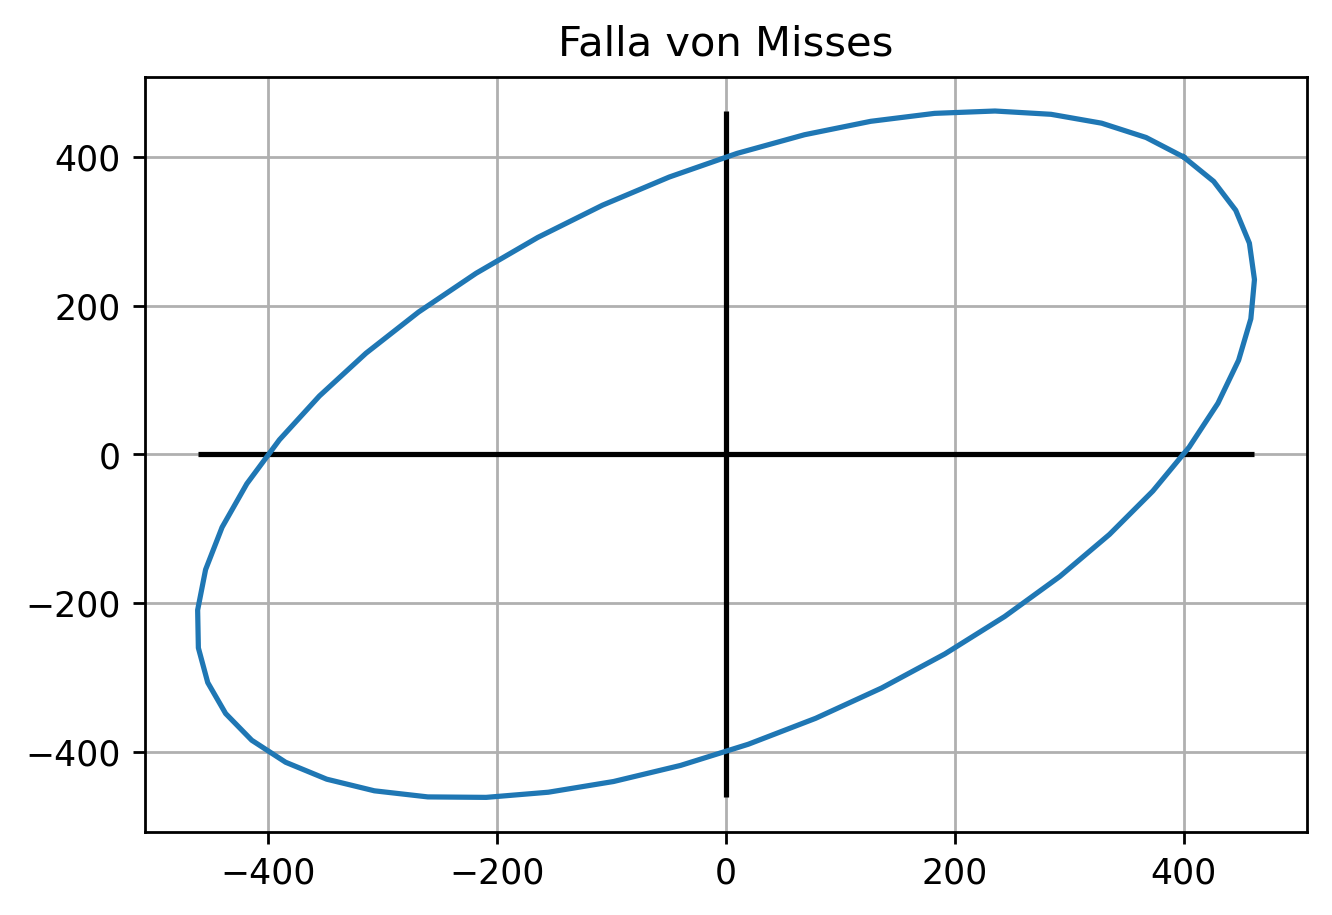

In [11]:
vonMissesG(Sy,s1,s2)

In [15]:
# Punto B
A = np.pi*((ro**2)-(ri**2))
tau_b = T*ro/J + 2*F/A 
tau_b= 2.8*tau_b*1e-6 # Pasarlo a MPa
sx_b = 0
sy_b = 0
tau_b

42.1096897733437

In [16]:
z1,z2 = s.SigmaPr(0,0,tau_b)

In [17]:
z1,z2

(42.1096897733437, -42.1096897733437)

In [19]:
vm_b = vonMisses(z1,z2)
n_b = Sy/vm_b
n_b

5.484250986385564

In [20]:
vm_b

72.93612217839485

# Punto 2

In [23]:
A_e = np.pi*(OD**2-(0.95*OD)**2)/4
d_eq = np.sqrt(A_e/0.0766)
d_eq

0.044993044122360236

In [26]:
kb = 1.44*(44**(-0.107))
kb

0.9605346934372114

In [27]:
import sympy as sp
S = sp.Symbol('S')
eq = sx_a- 4.51*(S**(-0.26))*S*0.96

In [28]:
eq

9.81313523319524 - 4.3296*S**0.74

In [29]:
sol = sp.solve(eq,S)

In [30]:
sol

[3.02145568028256]

In [31]:
sx_a

9.813135233195238